## Train a simple convnet on the Fashion MNIST dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
%matplotlib inlineciodels import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU

from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [47]:
print ('Train size:', x_train.shape[0])
print ('Test size:', x_test.shape[0])

Train size: 60000
Test size: 10000


In [0]:
""

### Find dimensions of an image in the dataset

In [48]:
x_train.shape

(60000, 28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
num_classes = 10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train = x_train.astype('float32')      # Change the data type to float from integer (0 - 255)
x_test = x_test.astype('float32')

 

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)   # Converting the target into categorical which is stored as numeric
y_test = keras.utils.to_categorical(y_test, num_classes) 

In [51]:
print ('Train size:', x_train.shape[0])
print ('Test size:', x_test.shape[0])

Train size: 60000
Test size: 10000


### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train /= 255                           # Scale the data between 0 and 1
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [53]:
x_train.shape

(60000, 28, 28, 1)

In [54]:
y_train.shape

(60000, 10)

### Import the necessary layers from keras to build the model

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
TRAIN = False
BATCH_SIZE = 5
EPOCHS = 10

In [56]:
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

# Define model
model2 = Sequential()

    # 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

    # 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

    # Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

    # Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if sys.path[0] == '':


In [0]:
# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [0]:
from keras.callbacks import EarlyStopping

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [59]:
model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 125s 2ms/step - loss: 0.3545 - acc: 0.8702 - val_loss: 0.3092 - val_acc: 0.8914
Epoch 2/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.2209 - acc: 0.9189 - val_loss: 0.2864 - val_acc: 0.8987
Epoch 3/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1544 - acc: 0.9421 - val_loss: 0.2919 - val_acc: 0.9093
Epoch 4/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.1072 - acc: 0.9609 - val_loss: 0.3423 - val_acc: 0.9089
Epoch 5/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0748 - acc: 0.9730 - val_loss: 0.3711 - val_acc: 0.9144
Epoch 6/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0548 - acc: 0.9804 - val_loss: 0.4383 - val_acc: 0.9099
Epoch 7/10
60000/60000 [===

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [61]:
# Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.25))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    
    # More Dropout
    model3.add(Dropout(0.5))

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto') 
    #Stop training when a monitored quantity has stopped improving.
    callback_list = [early_stopping]

    # Train the model
    model3.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.4609 - acc: 0.8338 - val_loss: 0.3076 - val_acc: 0.8859
Epoch 2/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.3280 - acc: 0.8806 - val_loss: 0.2729 - val_acc: 0.9031
Epoch 3/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.2936 - acc: 0.8949 - val_loss: 0.2522 - val_acc: 0.9085
Epoch 4/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.2749 - acc: 0.9008 - val_loss: 0.2605 - val_acc: 0.9092
Epoch 5/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.2654 - acc: 0.9062 - val_loss: 0.2535 - val_acc: 0.9129
Epoch 6/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.2538 - acc: 0.9084 - val_loss: 0.2434 - val_acc: 0.9156
Epoch 7/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.2491 - acc: 0.9097 - val_loss: 0.2490 - val_acc

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

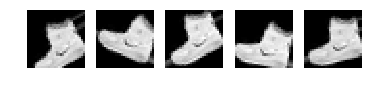

In [64]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [66]:
model3.fit_generator(datagen.flow(x_train, y_train,
                    batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
   9/1875 [..............................] - ETA: 31s - loss: 2.8142 - acc: 0.3958

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  """


1875/1875 [==============================] - 30s 16ms/step - loss: 1.1593 - acc: 0.5738 - val_loss: 0.3546 - val_acc: 0.8832
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.8678 - acc: 0.6813 - val_loss: 0.3645 - val_acc: 0.8770
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.7803 - acc: 0.7113 - val_loss: 0.3729 - val_acc: 0.8708
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.7190 - acc: 0.7329 - val_loss: 0.3611 - val_acc: 0.8740
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.6865 - acc: 0.7457 - val_loss: 0.3589 - val_acc: 0.8762
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.6659 - acc: 0.7544 - val_loss: 0.3633 - val_acc: 0.8768
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.6425 - acc: 0.7650 - val_loss: 0.3615 - val_acc: 0.8792
Epoch 8/10
1875/1875 [==============================] - 30s

###  Report the final train and validation accuracy

In [0]:
Train accuracy = 77.30%

In [0]:
Validation accuracy = 87.69%

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10, mnist

### **Load CIFAR10 dataset**

In [0]:
(x_traincf, y_traincf), (x_testcf, y_testcf) = cifar10.load_data()

In [0]:
num_classes = 10
x_traincf = x_traincf.reshape(x_traincf.shape[0], 32, 32, 3).astype('float32')
x_testcf = x_testcf.reshape(x_testcf.shape[0], 32, 32, 3).astype('float32')
x_traincf = x_traincf.astype('float32')      # Change the data type to float from integer (0 - 255)
x_testcf = x_testcf.astype('float32')

y_traincf = keras.utils.to_categorical(y_traincf, num_classes)   # Converting the target into categorical which is stored as numeric
y_testcf = keras.utils.to_categorical(y_testcf, num_classes)

x_traincf /= 255                           # Scale the data between 0 and 1
x_testcf /= 255

In [73]:
model4 = Sequential()

    # 1st Conv Layer
model4.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
model4.add(Activation('relu'))

    # 2nd Conv Layer
model4.add(Convolution2D(32, 3, 3))
model4.add(Activation('relu'))

    # Max Pooling
model4.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
model4.add(Dropout(0.25))

    # Fully Connected Layer
model4.add(Flatten())
model4.add(Dense(128))
model4.add(Activation('relu'))
    
    # More Dropout
model4.add(Dropout(0.5))

    # Prediction Layer
model4.add(Dense(10))
model4.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [77]:
# Loss and Optimizer
    model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto') 
    #Stop training when a monitored quantity has stopped improving.
    callback_list = [early_stopping]

    # Train the model
    model4.fit(x_traincf, y_traincf, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_testcf, y_testcf), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 86s 2ms/step - loss: 1.5661 - acc: 0.4301 - val_loss: 1.2627 - val_acc: 0.5478
Epoch 2/10
50000/50000 [==============================] - 85s 2ms/step - loss: 1.2949 - acc: 0.5438 - val_loss: 1.1131 - val_acc: 0.6136
Epoch 3/10
50000/50000 [==============================] - 85s 2ms/step - loss: 1.1898 - acc: 0.5804 - val_loss: 1.0670 - val_acc: 0.6196
Epoch 4/10
50000/50000 [==============================] - 85s 2ms/step - loss: 1.1314 - acc: 0.6032 - val_loss: 1.0642 - val_acc: 0.6245
Epoch 5/10
50000/50000 [==============================] - 85s 2ms/step - loss: 1.0882 - acc: 0.6174 - val_loss: 1.0008 - val_acc: 0.6488
Epoch 6/10
50000/50000 [==============================] - 85s 2ms/step - loss: 1.0520 - acc: 0.6306 - val_loss: 1.0226 - val_acc: 0.6398
Epoch 7/10
50000/50000 [==============================] - 85s 2ms/step - loss: 1.0208 - acc: 0.6400 - val_loss: 1.0428 - val_acc

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:

def data_gen(image_rot=50 , width_shift_range=0.1,height_shift_range=0.1, horizontal_flip=True):
    datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=image_rot,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=width_shift_range,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=horizontal_flip,  # randomly flip images
    vertical_flip=False)  # randomly flip images
    return datagen

### **Prepare/fit the generator.**

In [0]:
dgen=data_gen()

In [0]:
dgen.fit(x_traincf)

In [85]:
model4.fit_generator(datagen.flow(x_traincf, y_traincf,
                    batch_size=32),
                    samples_per_epoch=x_traincf.shape[0],
                    nb_epoch=10,
                    validation_data=(x_testcf, y_testcf), callbacks=callback_list)

Epoch 1/10
   7/1562 [..............................] - ETA: 41s - loss: 2.0145 - acc: 0.3973

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1562, epochs=10)`
  """


1562/1562 [==============================] - 38s 24ms/step - loss: 1.5803 - acc: 0.4446 - val_loss: 1.1613 - val_acc: 0.6090
Epoch 2/10
1562/1562 [==============================] - 38s 24ms/step - loss: 1.4989 - acc: 0.4683 - val_loss: 1.1408 - val_acc: 0.6059
Epoch 3/10
1562/1562 [==============================] - 37s 24ms/step - loss: 1.4630 - acc: 0.4793 - val_loss: 1.1395 - val_acc: 0.6006
Epoch 4/10
1562/1562 [==============================] - 37s 24ms/step - loss: 1.4355 - acc: 0.4909 - val_loss: 1.1103 - val_acc: 0.6194
Epoch 5/10
1562/1562 [==============================] - 37s 24ms/step - loss: 1.4204 - acc: 0.4952 - val_loss: 1.0890 - val_acc: 0.6201
Epoch 6/10
1562/1562 [==============================] - 37s 24ms/step - loss: 1.3956 - acc: 0.5058 - val_loss: 1.1884 - val_acc: 0.5949
Epoch 7/10
1562/1562 [==============================] - 38s 24ms/step - loss: 1.3796 - acc: 0.5069 - val_loss: 1.0741 - val_acc: 0.6241
Epoch 8/10
1562/1562 [==============================] - 37s

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

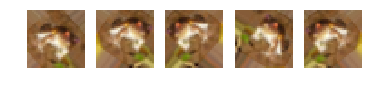

In [86]:
from matplotlib import pyplot as plt
gen = dgen.flow(x_traincf[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()